# Doritos and Lays cookies detection with  Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import cookies
%matplotlib inline 

# Directory of images and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs", "cookies20190904T1713")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/media/yuwei/Data/YuWei/ML_DL/Cookies-Detection


Using TensorFlow backend.


## Configurations

We'll be using a model trained on the toy dataset about two cookies brands. The configurations of this model are in the ```CookiesConfig``` class in ```cookies.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CookiesConfig``` class and override the attributes you need to change.

In [2]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

config = cookies.CookiesConfig()
COOKIES_DIR = os.path.join(ROOT_DIR, "datasets/cookies")

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.RPN_NMS_THRESHOLD = 0.8
# config.DETECTION_NMS_THRESHOLD = 0.3
config.DETECTION_MIN_CONFIDENCE = 0.96
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAME_LIST                ['BG', 'lays', 'doritos']
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.96
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1

## Create Model and Load Trained Weights

In [3]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

weights_path = os.path.join(MODEL_DIR, "mask_rcnn_cookies_0109.h5")

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Loading weights  /media/yuwei/Data/YuWei/ML_DL/Cookies-Detection/logs/cookies20190904T1713/mask_rcnn_cookies_0109.h5
Re-starting from epoch 109


## Class Names and images for testing

In [4]:
# Cookies class names
# confirm the list of class name is in correct sequence.
class_names = config.CLASS_NAME_LIST
print(class_names)

['BG', 'lays', 'doritos']


In [5]:
file_names_list = next(os.walk(IMAGE_DIR))[2]
for fid , fn in enumerate(file_names_list):
    print("{}, {}".format(fid, fn))

0, 10503647785062.jpg
1, 10506227236894.jpg
2, 10506228698665.jpg
3, 10506228923128.jpg
4, 10509506623156.jpg
5, 10509506702263.jpg
6, 8708687991_8f271d4d60_o.jpg
7, d7a6d3a5c3e44b4f99192aa7e7f3841c.jpg
8, google_0001.jpg
9, google_0347.jpg
10, google_0484.jpg
11, MT190319164316509218.jpg


## Run Object Detection

### Use detection function in "cookies.py":
This part is in the ``detection`` of ``cookies.py`` which was build with opencv and designed to fix the color corresponding to each class rather than be random in every detection. Furthermore, it will automatically save the detection results under the ``weight_path``.
Since ``cv2.imshow`` might easly cause the programe lost response when you directly close the displayed window, you can pass the key ``show=False`` in ``cookies.detect`` for not showing on OpenCV. 

In [6]:
# Define color value in 0~1 with RGB order for each class for detection:
colors = [(0.0, 1.0, 0.40), (1.0, 0.60, 0.0), (0.0, 0.85, 1.0)]
# Or use the code below to generate random color:
# colors = visualize.random_colors(20)
# np.random.shuffle(colors)
# colors = colors[0:3]

Running on /media/yuwei/Data/YuWei/ML_DL/Cookies-Detection/images/10506228923128.jpg
Processing 1 images
image                    shape: (1108, 1478, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1478.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Saved to  10506228923128.jpg


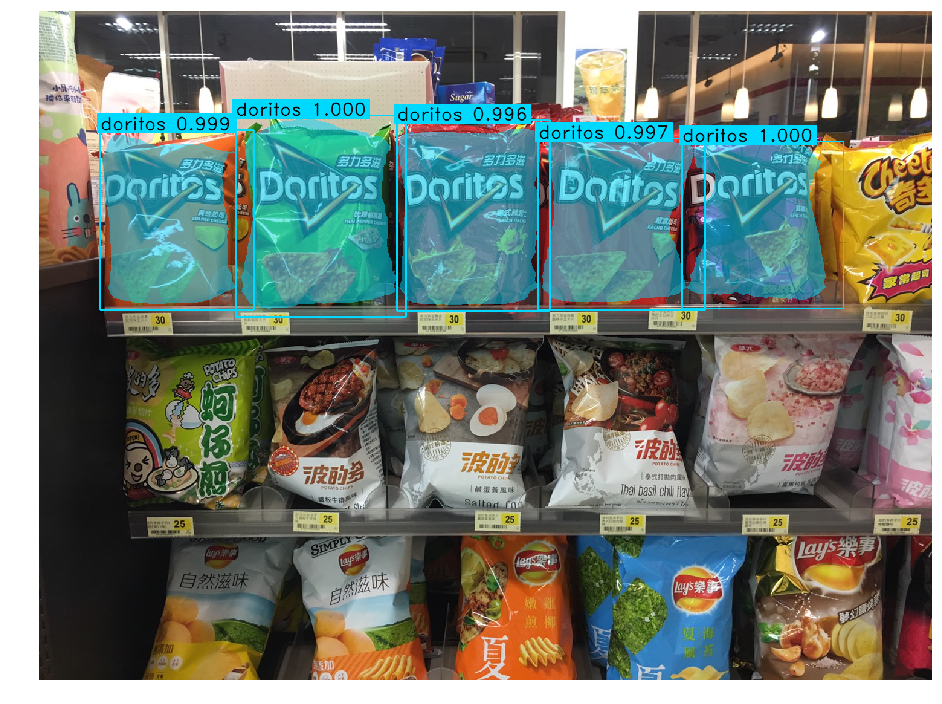

In [7]:
# Use detection function to draw with opencv and save as image:
file_name = random.choice(file_names_list)
# Specify the image directly.
# file_name = file_names_list[1]
detect_img = cookies.detect(model, 
                            weights_path=weights_path, 
                            image_path = os.path.join(IMAGE_DIR, file_name),
                            colors_each_class=colors,
                            show=False)
detect_img = detect_img[..., ::-1].copy()
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(detect_img)
ax.set_axis_off()

### Use function sets "visualize" to display the detection:

Processing 1 images
image                    shape: (1108, 1478, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1478.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


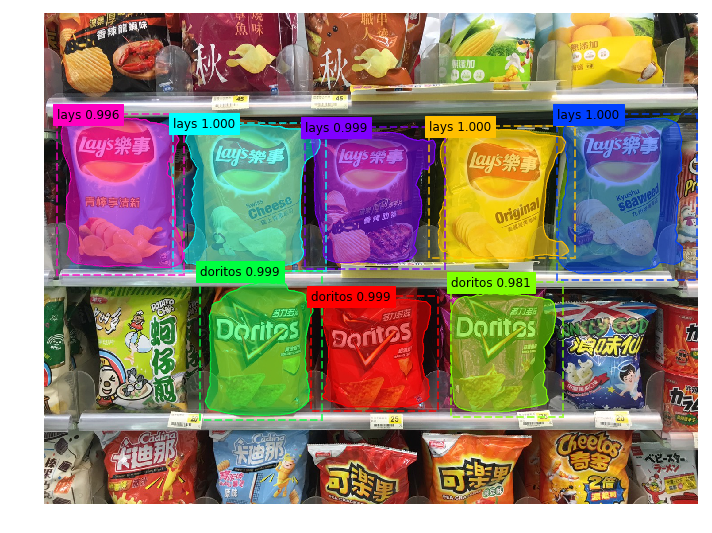

In [10]:
# Load a random image from the images folder
file_name = random.choice(file_names_list)
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],
                            figsize=(10, 10),
                            fontsize=12)
#                             savedir=os.path.join(MODEL_DIR, 'detect_' + file_names)) # or pass the 'savedir' to save the result.